In [ ]:
import pandas as pd

df_list = []
filepath ='/content/Bank Dataset Hierarchy - CatagoricalIntents.csv'
df = pd.read_csv(filepath, encoding = "utf-8", names=['sentence', 'Level1', 'Level2'], sep=',')
df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    நான் 2in1 கணக்கில் சேமிப்பது எப்படி ?
Level1                                       2in1
Level2                          2in1_acoount_info
Name: 0, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

sentences = df['sentence'].values
y = df['Level1'].values

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
import nltk
nltk.download("punkt")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

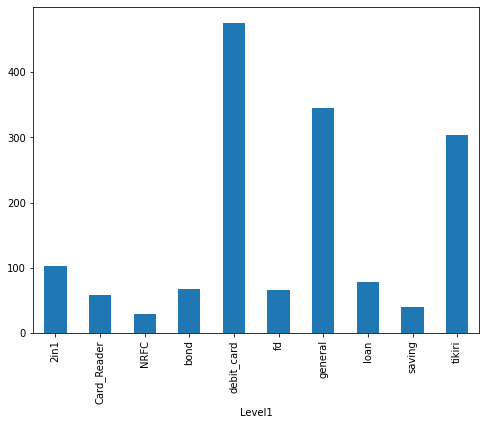

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Level1').size().plot.bar(ylim=0)
plt.show()

In [ ]:
ab = df.groupby('Level1').count()
print(ab.sort_values(by="sentence",axis=0))



             sentence  Level2
Level1                       
NRFC               29      29
saving             40      40
Card_Reader        58      58
fd                 66      66
bond               67      67
loan               79      79
2in1              103     103
tikiri            304     304
general           345     345
debit_card        476     476


In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30)

In [ ]:
vectorizer1 = CountVectorizer(encoding='utf-8', tokenizer=nltk.word_tokenize)
vectorizer1.fit(sentences_train)

X_train = vectorizer1.transform(sentences_train)
X_test  = vectorizer1.transform(sentences_test)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
C = 1.0 # SVM regularization parameter

classifier = svm.SVC(kernel='linear', C=1,gamma=1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

0.9978768577494692


In [ ]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(classifier, 'SVML1.pkl') 
  
# Load the model from the file 
knn_from_joblib = joblib.load('SVML1.pkl')  
  


In [ ]:
#print(sentences_test[0:10])
y_pred =classifier.predict(X_test)
df1 = pd.DataFrame(sentences_test, columns=["X"])
df1["actual"] = y_test
df1["predicted"] = y_pred

incorrect = df1[df1["actual"] != df1["predicted"]]
incorrect.to_csv(r'pandas.txt', header=None, index=None, sep=' ', mode='a')
print(incorrect)

                                               X      actual predicted
13   கடனைப்பெற எதிர்பார்க்கப்படும் தகைமைகள் எவை?  debit_card   general
133                     கடனைப்பெற தேவையானவை எவை?  debit_card   general
286     கடனைப்பெற நாம் வைத்திருக்கவேண்டியவை எவை?  debit_card   general


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np 
predictions = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


[[ 28   0   0   0   0   0   0   0   0   0]
 [  0  22   0   0   0   0   0   0   0   0]
 [  0   0  12   0   0   0   0   0   0   0]
 [  0   0   0  16   0   0   0   0   0   0]
 [  0   0   0   0 137   0   0   0   0   0]
 [  0   0   0   0   0  22   0   0   0   0]
 [  0   0   0   0   0   0 112   0   0   0]
 [  0   0   0   0   0   0   0  20   0   0]
 [  0   0   0   0   0   0   1   0  13   0]
 [  0   0   0   0   0   0   0   0   0  88]]


In [ ]:
data2in1 = df[df["Level1"] == "2in1"]


In [ ]:
print(data2in1.iloc[0])
sentences = data2in1['sentence'].values
y = data2in1['Level2'].values
ab = data2in1.groupby('Level2').count()
print(ab.sort_values(by="sentence",axis=0))


sentence    நான் 2in1 கணக்கில் சேமிப்பது எப்படி ?
Level1                                       2in1
Level2                          2in1_acoount_info
Name: 0, dtype: object
                         sentence  Level1
Level2                                   
2in1_atm_card                  15      15
2in1_acoount_info              19      19
2in1_pass_book                 20      20
2in1_min_balance               21      21
2in1_interest_receiving        28      28


In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30)
vectorizer = CountVectorizer(encoding='utf-8', tokenizer=nltk.word_tokenize)
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
C = 1.0 # SVM regularization parameter

classifier = svm.SVC(kernel='linear', C=1,gamma=1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

1.0


In [ ]:
# Save the model as a pickle in a file 
joblib.dump(classifier, 'SVM 2in1.pkl') 

['SVM 2in1.pkl']

In [ ]:
dataNRFC = df[df["Level1"] == "NRFC"]
print(dataNRFC.iloc[0])
sentences = dataNRFC['sentence'].values
y = dataNRFC['Level2'].values
ab = dataNRFC.groupby('Level2').count()
print(ab.sort_values(by="sentence",axis=0))


sentence    வெளிநாட்டில் வசிக்கும் நான் (NRFC) வதிவற்ற வெள...
Level1                                                   NRFC
Level2                                   NRFC_account_opening
Name: 936, dtype: object
                      sentence  Level1
Level2                                
NRFC_info                   13      13
NRFC_account_opening        16      16


In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30)
vectorizer = CountVectorizer(encoding='utf-8', tokenizer=nltk.word_tokenize)
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

C = 1.0 # SVM regularization parameter

classifier = svm.SVC(kernel='linear', C=1,gamma=1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

1.0


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
# Save the model as a pickle in a file 
joblib.dump(classifier, 'SVM NRFC.pkl') 

['SVM NRFC.pkl']

In [ ]:
datasaving = df[df["Level1"] == "saving"]
print(datasaving.iloc[0])
sentences = datasaving['sentence'].values
y = datasaving['Level2'].values
ab = datasaving.groupby('Level2').count()
print(ab.sort_values(by="sentence",axis=0))


sentence    எனது வங்கிக் கூற்றினை இணையத்தின் மூலம் பெற்றுக...
Level1                                                 saving
Level2                                  bank_statement_online
Name: 113, dtype: object
                          sentence  Level1
Level2                                    
bank_statement_online           10      10
interest_credit_info            10      10
new_saving_book                 10      10
saving_atmcard_available        10      10


In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30)
vectorizer = CountVectorizer(encoding='utf-8', tokenizer=nltk.word_tokenize)
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

C = 1.0 # SVM regularization parameter

classifier = svm.SVC(kernel='linear', C=1,gamma=1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

1.0


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
# Save the model as a pickle in a file 
joblib.dump(classifier, 'SVM saving.pkl')

['SVM saving.pkl']

In [ ]:
dataCard_Reader = df[df["Level1"] == "Card_Reader"]
print(dataCard_Reader.iloc[0])
sentences = dataCard_Reader['sentence'].values
y = dataCard_Reader['Level2'].values
ab = dataCard_Reader.groupby('Level2').count()
print(ab.sort_values(by="sentence",axis=0))

sentence    கருவி பழுதடைதல் போன்ற விடயங்களுக்கு யாருடன் தொ...
Level1                                            Card_Reader
Level2                                    card_machine_repair
Name: 271, dtype: object
                      sentence  Level1
Level2                                
card_machine_repair          9       9
new_card_reader_cost        49      49


In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30)
vectorizer = CountVectorizer(encoding='utf-8', tokenizer=nltk.word_tokenize)
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

C = 1.0 # SVM regularization parameter

classifier = svm.SVC(kernel='linear', C=1,gamma=1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

1.0


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
# Save the model as a pickle in a file 
joblib.dump(classifier, 'Card_Reader.pkl')

['Card_Reader.pkl']

In [ ]:
datafd = df[df["Level1"] == "fd"]
print(datafd.iloc[0])
sentences = datafd['sentence'].values
y = datafd['Level2'].values
ab = datafd.groupby('Level2').count()
print(ab.sort_values(by="sentence",axis=0))


sentence    வெளிநாட்டு நாணய நிலையான வைப்பினை பெறுவதற்கு மு...
Level1                                                     fd
Level2                            foreign_currency_withdrawal
Name: 571, dtype: object
                                      sentence  Level1
Level2                                                
precashing_foreign_fixed_deposit            14      14
foreign_currency_withdrawal                 17      17
foreign_currency_withdrawal_currency        17      17
foreign_deposit_loan                        18      18


In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30)
vectorizer = CountVectorizer(encoding='utf-8', tokenizer=nltk.word_tokenize)
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

C = 1.0 # SVM regularization parameter

classifier = svm.SVC(kernel='linear', C=1,gamma=1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

0.95


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
# Save the model as a pickle in a file 
joblib.dump(classifier, 'SVM fd.pkl')

['SVM fd.pkl']

In [ ]:
databond = df[df["Level1"] == "bond"]
print(datafd.iloc[0])
sentences = databond['sentence'].values
y = databond['Level2'].values
ab = databond.groupby('Level2').count()
print(ab.sort_values(by="sentence",axis=0))


sentence    வெளிநாட்டு நாணய நிலையான வைப்பினை பெறுவதற்கு மு...
Level1                                                     fd
Level2                            foreign_currency_withdrawal
Name: 571, dtype: object
                                  sentence  Level1
Level2                                            
treasury_bond_advantage                 19      19
treasury_bond_important_features        24      24
treasury_bond_information               24      24


In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30)
vectorizer = CountVectorizer(encoding='utf-8', tokenizer=nltk.word_tokenize)
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

C = 1.0 # SVM regularization parameter

classifier = svm.SVC(kernel='linear', C=1,gamma=1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

0.9047619047619048


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
joblib.dump(classifier, 'SVM bond.pkl')

['SVM bond.pkl']

In [ ]:
dataloan = df[df["Level1"] == "loan"]
print(dataloan.iloc[0])
sentences = dataloan['sentence'].values
y = dataloan['Level2'].values
ab = dataloan.groupby('Level2').count()
print(ab.sort_values(by="sentence",axis=0))


sentence    வீடமைப்பு கடனை பெற்றுக் கொள்ள தேவையான ஆவணங்கள்...
Level1                                                   loan
Level2                                 housing_loan_documents
Name: 700, dtype: object
                           sentence  Level1
Level2                                     
housing_loan_documents           10      10
internet_bank_loan_amount        15      15
loan_requirement                 19      19
housing_loan_purpose             35      35


In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30)
vectorizer = CountVectorizer(encoding='utf-8', tokenizer=nltk.word_tokenize)
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

C = 1.0 # SVM regularization parameter

classifier = svm.SVC(kernel='linear', C=1,gamma=1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

1.0


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
joblib.dump(classifier, 'SVM loan.pkl')

['SVM loan.pkl']

In [ ]:
datatikiri = df[df["Level1"] == "tikiri"]
print(datatikiri.iloc[0])
sentences = datatikiri['sentence'].values
y = datatikiri['Level2'].values
ab = datatikiri.groupby('Level2').count()
print(ab.sort_values(by="sentence",axis=0))


sentence    “செலான் டிக்கிரி” கணக்கை ஆரம்பிப்பதற்குத் தேவை...
Level1                                                 tikiri
Level2                          seylan_tikiri_minimum_deposit
Name: 1079, dtype: object
                                 sentence  Level1
Level2                                           
tikiri_gift_voucher_redeem             14      14
tikiri_gift_voucher_age_limit          18      18
tikiri_gift_voucher_validity           19      19
tikiri_gift_voucher_withdrawal         19      19
tikiri_gift_voucher_min_amount         21      21
tikiri_gift_voucher_per_person         21      21
tikiri_gift_voucher_buying_info        22      22
tikiri_gift_voucher_info               23      23
tikiri_required_docs                   64      64
seylan_tikiri_minimum_deposit          83      83


In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30)
vectorizer = CountVectorizer(encoding='utf-8', tokenizer=nltk.word_tokenize)
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

C = 1.0 # SVM regularization parameter

classifier = svm.SVC(kernel='linear', C=1,gamma=1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

0.9782608695652174


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
joblib.dump(classifier, 'SVM tikiri.pkl')

['SVM tikiri.pkl']

In [ ]:
datageneral = df[df["Level1"] == "general"]
print(datageneral.iloc[0])
sentences = datageneral['sentence'].values
y = datageneral['Level2'].values
ab = datageneral.groupby('Level2').count()
print(ab.sort_values(by="sentence",axis=0))


sentence    செலான் வங்கியில் கணக்கை ஆரம்பிக்க பயன்படுத்தக்...
Level1                                                general
Level2                                       account_currency
Name: 103, dtype: object
                                sentence  Level1
Level2                                          
SLBFE_info                            10      10
account_currency                      10      10
joint_account_details                 10      10
selan_sure_info                       10      10
marriage_claim                        13      13
foreign_account_lkr_withdrawal        18      18
get_lc_form                           19      19
repos_benefits                        20      20
update_personal_details               21      21
sl_development_bond_benefits          22      22
resident_foreign_account_info         60      60
life_insurance_limit                  65      65
FCAISPE_required_docs                 67      67


In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30)
vectorizer = CountVectorizer(encoding='utf-8', tokenizer=nltk.word_tokenize)
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

C = 1.0 # SVM regularization parameter

classifier = svm.SVC(kernel='linear', C=1,gamma=1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

0.9807692307692307


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
joblib.dump(classifier, 'SVM general.pkl')

['SVM general.pkl']

In [ ]:
datadebit_card = df[df["Level1"] == "debit_card"]
print(datadebit_card.iloc[0])
sentences = datadebit_card['sentence'].values
y = datadebit_card['Level2'].values
ab = datadebit_card.groupby('Level2').count()
print(ab.sort_values(by="sentence",axis=0))


sentence    எனது கடன் அட்டை கணக்கை எவ்வாறு நான் இரத்துச் ச...
Level1                                             debit_card
Level2                                            cancel_card
Name: 123, dtype: object
                        sentence  Level1
Level2                                  
cancel_card                   27      27
debit_card_requirement        41      41
CVV_use                       44      44
change_details                49      49
card_automatic_renewal        50      50
get_monthly_report            58      58
suspious_activity             64      64
card_foreign_use              71      71
card_usage                    72      72


In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30)
vectorizer = CountVectorizer(encoding='utf-8', tokenizer=nltk.word_tokenize)
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

C = 1.0 # SVM regularization parameter

classifier = svm.SVC(kernel='linear', C=1,gamma=1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

0.986013986013986


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
joblib.dump(classifier, 'SVM debit_card.pkl')

['SVM debit_card.pkl']

In [ ]:
df_list = []
filepath ='/content/Bank Dataset Hierarchy - CatagoricalIntents.csv'
df = pd.read_csv(filepath, encoding = "utf-8", names=['sentence', 'Level1', 'Level2'], sep=',')
df_list.append(df)

df = pd.concat(df_list)
df =df.sample(frac = 0.3) 
print(df.iloc[0])

sentence    வீடமைப்பு கடனை எவ்வாறான தேவைகளுக்கு பெற முடியு...
Level1                                                   loan
Level2                                   housing_loan_purpose
Name: 717, dtype: object


In [ ]:
sentences_test = df['sentence'].values
y_test = df['Level1'].values
y_test1= df['Level2'].values

In [ ]:
#vectorizer = CountVectorizer(encoding='utf-8', tokenizer=nltk.word_tokenize)
#vectorizer.fit(sentences_test )

X_test  = vectorizer1.transform(sentences_test)

In [ ]:
# Load the model from the file 
level1 = joblib.load('/content/SVML1.pkl')  
  

In [ ]:

y_pred = level1.predict(X_test)
df1 = pd.DataFrame(sentences_test, columns=["sentence"])
df1["Level2"]=y_test1
df1["L1predicted"] = y_pred


                                              sentence  ... L1predicted
0    வீடமைப்பு கடனை எவ்வாறான தேவைகளுக்கு பெற முடியு...  ...        loan
1    வெளிநாட்டு நாணய நிலையான வைப்பிற்கு எதிராக கடன்...  ...          fd
2                நான் எப்படி 2in1 கணக்கில் சேமிப்பது ?  ...        2in1
3     NRFC தொடர்பான தகவல்களை தெரிந்து கொள்வது எவ்வாறு?  ...        NRFC
4    எனக்கு வதிவுள்ள வெளிநாட்டு நாணய கணக்கொன்றை ஆரம...  ...     general
..                                                 ...  ...         ...
465  திறைசேரி உண்டியல்களின் முக்கிய அம்சங்கள் பற்றி...  ...        bond
466  திறைசேரி உண்டியல்கள் மற்றும் பத்திங்கள் மூலம் ...  ...        bond
467  திறைசேரி உண்டியல்கள் மற்றும் பத்திரங்களின் நன்...  ...        bond
468                     CVV எத்தனை இலக்கங்களை கொண்டது?  ...  debit_card
469              CVV இலக்கத்தை மறந்தால் என்ன செய்வது ?  ...  debit_card

[470 rows x 3 columns]


In [ ]:
print(df1.iloc[0])

sentence       வீடமைப்பு கடனை எவ்வாறான தேவைகளுக்கு பெற முடியு...
Level2                                      housing_loan_purpose
L1predicted                                                 loan
Name: 0, dtype: object


In [ ]:
ab = df1.groupby('L1predicted').count()
print(ab.sort_values(by="sentence",axis=0))

             sentence  Level2
L1predicted                  
saving              9       9
NRFC               10      10
Card_Reader        12      12
bond               19      19
fd                 19      19
2in1               25      25
loan               30      30
tikiri             89      89
general           106     106
debit_card        151     151


In [ ]:
NRFC = df1[df1["L1predicted"] == "NRFC"]
NRFC_test = NRFC['sentence'].values
NRFC_y_test1= NRFC['Level2'].values


In [ ]:
Card_Reader = df1[df1["L1predicted"] == "Card_Reader"]
Card_Reader_test = Card_Reader['sentence'].values
Card_Reader_y_test1= Card_Reader['Level2'].values

saving = df1[df1["L1predicted"] == "saving"]
saving_test = saving['sentence'].values
saving_y_test1= saving['Level2'].values

bond = df1[df1["L1predicted"] == "bond"]
bond_test = bond['sentence'].values
bond_y_test1= bond['Level2'].values

fd = df1[df1["L1predicted"] == "fd"]
fd_test = fd['sentence'].values
fd_y_test1= fd['Level2'].values

Twoin1 = df1[df1["L1predicted"] == "2in1"]
Twoin1_test = Twoin1['sentence'].values
Twoin1_y_test1= Twoin1['Level2'].values

loan = df1[df1["L1predicted"] == "loan"]
loan_test = loan['sentence'].values
loan_y_test1= loan['Level2'].values

tikiri = df1[df1["L1predicted"] == "tikiri"]
tikiri_test = tikiri['sentence'].values
tikiri_y_test1= tikiri['Level2'].values

general = df1[df1["L1predicted"] == "general"]
general_test = general['sentence'].values
general_y_test1= general['Level2'].values

debit_card = df1[df1["L1predicted"] == "debit_card"]
debit_card_test = debit_card['sentence'].values
debit_card_y_test1= debit_card['Level2'].values


In [ ]:
l2 = joblib.load('/content/SVM 2in1.pkl')  
y_pred = l2.predict(Twoin1)
df2 = pd.DataFrame(sentences_test, columns=["sentence"])
df2["L2predicted"] = y_pred
print(df2)

                                             sentence              L2predicted
0   2in1 சேமிப்புக் கணக்கிற்கான வட்டி விபரங்களை சொ...  2in1_interest_receiving
1   2in1 கணக்கில் சேமிப்பு வைக்க கையாள வேண்டிய படி...        2in1_acoount_info
2             2in1 கணக்குக்கு ATM அட்டை வழங்கப்படுமா?            2in1_atm_card
3     2in 1 சேமிப்பு கணக்கிற்கான வட்டியை பெறும் முறை.  2in1_interest_receiving
4   2in1 சேமிப்புக் கணக்கிற்கான சேமிப்பு புத்தகத்த...           2in1_pass_book
5   நான் 2in 1 சேமிப்பு கணக்கிற்கான வட்டியை பெறுவத...  2in1_interest_receiving
6   2in 1 சேமிப்பு கணக்கிற்கான சேமிப்பு புத்தகத்தை...           2in1_pass_book
7   நாங்கள் 2in 1 சேமிப்பு கணக்குகளுக்கான வட்டியை ...  2in1_interest_receiving
8   2 in1 கணக்கில் ஆகக்குறைந்தது எவ்வளவு தொகை காணப...         2in1_min_balance
9   2 in 1 வங்கி கணக்குகளில் எவ்வளவு தொகை பணத்தை ந...         2in1_min_balance
10                 2 in 1 கணக்கு ஆரம்பிப்பது எவ்வாறு?        2in1_acoount_info
11   நான் 2 in 1 கணக்கில் சேமிக்க தொடங்குவது எவ்வாறு